# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`instacart_orders.csv`, `products.csv`, `aisles.csv`, `departments.csv` y `order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.

In [36]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')

# mostrar información del DataFrame
print("Orders DataFrame:")
orders.info()
orders.head()



Orders DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [37]:
# mostrar información del DataFrame
print("\nProducts DataFrame:")
products.info()
products.head()


Products DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [38]:
# mostrar información del DataFrame
print("\nAisles DataFrame:")
aisles.info()
aisles.head()


Aisles DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [39]:
# mostrar información del DataFrame
print("\nDepartments DataFrame:")
departments.info()
departments.head()


Departments DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [40]:
# mostrar información del DataFrame
print("\nOrder_products DataFrame:")
order_products.info()
order_products.head()


Order_products DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

Encontre valores ausentes y duplicados y los corregi usando la media para columnas numericas y para columnas categoricas use la media y al final aplique drop_duplicates

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [41]:
# Verificar si hay filas duplicadas en el DataFrame
duplicados = orders.duplicated()

# Contar cuántos pedidos duplicados hay
cantidad_duplicados = duplicados.sum()

# Obtener las filas duplicadas
filas_duplicadas = orders[duplicados]

# Mostrar la cantidad de pedidos duplicados
print(f"Hay {cantidad_duplicados} pedidos duplicados en el conjunto de datos.")

# Mostrar las filas duplicadas
print(filas_duplicadas)

Hay 15 pedidos duplicados en el conjunto de datos.
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   


### ¿Tienes líneas duplicadas? Si, ¿qué tienen en común? Se hicieron el mismo dia y comparten días transcurridos desde que este cliente hizo su pedido anterior que es igual a 0

In [42]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

# Filtrar los pedidos que se hicieron el miércoles (3) a las 2:00 a.m. (2)
miércoles_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

# Mostrar los resultados
print(miércoles_2am_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Estructura de los Datos: La salida muestra que cada fila representa un pedido, con información sobre el ID del pedido, el ID del usuario, el número de pedido, el día de la semana, la hora del día y los días desde el último pedido. Esto puede ser útil para análisis posteriores, como entender patrones de compra o la frecuencia de pedidos de los usuarios.

Análisis Potencial: Con estos datos, podrías realizar análisis adicionales, como:

Examinar el comportamiento de compra de los usuarios en diferentes días y horas.
Analizar la relación entre el tiempo desde el último pedido y la probabilidad de realizar un nuevo pedido.
Identificar tendencias en las compras a lo largo del tiempo.

In [43]:
# Elimina los pedidos duplicados

# Mostrar los resultados antes de eliminar duplicados
print("Antes de eliminar duplicados:")
print(miércoles_2am_orders)

# Eliminar los pedidos duplicados
miércoles_2am_orders = miércoles_2am_orders.drop_duplicates()

# Mostrar los resultados después de eliminar duplicados
print("Después de eliminar duplicados:")
print(miércoles_2am_orders)


Antes de eliminar duplicados:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      1

In [44]:
# Vuelve a verificar si hay filas duplicadas

duplicados = miércoles_2am_orders.duplicated().sum()
print(f"Número de filas duplicadas restantes: {duplicados}")

Número de filas duplicadas restantes: 0


In [45]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicados = miércoles_2am_orders[miércoles_2am_orders.duplicated(subset='order_id', keep=False)]
print("IDs de pedidos duplicados:")
print(duplicados)


IDs de pedidos duplicados:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### `products` data frame

In [46]:
# Verificar duplicados en los IDs de departamentos
duplicados_departamentos = products['department_id'].duplicated(keep=False)

# Mostrar los departamentos duplicados
departamentos_duplicados = products[duplicados_departamentos]

print(departamentos_duplicados)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [47]:
# Verifica si hay filas duplicadas
duplicados = products.duplicated()

# Muestra el número de filas duplicadas
numero_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {numero_duplicados}")

# Si quieres ver las filas duplicadas
filas_duplicadas = products[duplicados]
print(filas_duplicadas)

Número de filas duplicadas: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [48]:
# Convertir los nombres de productos a mayúsculas y verificar duplicados
duplicados = products['product_name'].str.upper().duplicated(keep=False)

# Mostrar los productos duplicados
productos_duplicados = products[duplicados]

print(productos_duplicados)

       product_id                                     product_name  aisle_id  \
37             38                                              NaN       100   
41             42                                  Biotin 1000 mcg        47   
71             72                                              NaN       100   
109           110                                              NaN       100   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
37              

In [49]:
# Filtrar los productos que no son faltantes
productos_no_faltantes = products[products['product_name'].notna()]

# Verificar duplicados en los nombres de productos
duplicados = productos_no_faltantes['product_name'].duplicated(keep=False)

# Mostrar los productos duplicados
productos_duplicados = productos_no_faltantes[duplicados]

print(productos_duplicados)


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


### `departments` data frame

In [50]:
# Verificar filas duplicadas
duplicados = departments.duplicated(keep=False)

# Mostrar filas duplicadas
filas_duplicadas = departments[duplicados]

print(filas_duplicadas)

Empty DataFrame
Columns: [department_id, department]
Index: []


In [51]:
# Verificar IDs duplicados en la columna 'product_id'
duplicados_productos = departments['department_id'].duplicated(keep=False)

# Mostrar los productos duplicados
productos_duplicados = departments[duplicados_productos]

print(productos_duplicados)


Empty DataFrame
Columns: [department_id, department]
Index: []


### `aisles` data frame

In [52]:
# Verificar filas duplicadas
duplicados = aisles.duplicated(keep=False)

# Mostrar filas duplicadas
filas_duplicadas = aisles[duplicados]

print(filas_duplicadas)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [53]:
# Verificar duplicados únicamente en la columna aisle_id
duplicados = aisles.duplicated(subset=['aisle_id'], keep=False)

# Mostrar filas con IDs duplicadas
filas_duplicadas = aisles[duplicados]

print(filas_duplicadas)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


### `order_products` data frame

In [54]:
# Verificar filas duplicadas
duplicados = order_products.duplicated(keep=False)

# Mostrar filas duplicadas
filas_duplicadas = order_products[duplicados]

print(filas_duplicadas)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [55]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Verificar duplicados en columnas específicas
# Por ejemplo, si quieres verificar duplicados en 'order_id' y 'product_id'
duplicados_eng = order_products.duplicated(subset=['order_id', 'product_id'], keep=False)

# Mostrar filas que son duplicados engañosos
filas_duplicadas_eng = order_products[duplicados_eng]

print(filas_duplicadas_eng)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [56]:
# Contar los valores ausentes en la columna 'product_name'
valores_ausentes = products['product_name'].isnull().sum()

print(f"Cantidad de valores ausentes en 'product_name': {valores_ausentes}")

Cantidad de valores ausentes en 'product_name': 1258


In [57]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? 

# Filtrar los productos con nombres ausentes
missing_products = products[products['product_name'].isnull()]

# Comprobar si todos los productos ausentes están en el pasillo con ID 100
all_missing_in_aisle_100 = missing_products['aisle_id'].eq(100).all()

# Imprimir el resultado
print(all_missing_in_aisle_100)

True


In [58]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

# Filtrar los productos con nombres ausentes
missing_products = products[products['product_name'].isnull()]

# Comprobar si todos los productos ausentes están en el departamento con ID 21
all_missing_in_department_21 = missing_products['department_id'].eq(21).all()

# Imprimir el resultado
print(all_missing_in_department_21)

True


In [59]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

# Filtrar el pasillo con ID 100
aisle_100 = aisles[aisles['aisle_id'] == 100]

# Filtrar el departamento con ID 21
department_21 = departments[departments['department_id'] == 21]

# Imprimir los resultados
print("Datos del pasillo con ID 100:")
print(aisle_100)

print("\nDatos del departamento con ID 21:")
print(department_21)

Datos del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Datos del departamento con ID 21:
    department_id department
20             21    missing


In [60]:
# Completa los nombres de productos ausentes con 'Unknown'

# Completar los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

# Verificar los cambios
print(products)


       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

### Se escribio el codigo para reemplazar productos ausentes usando la funcion "fillna"

### `orders` data frame

In [61]:
# Encuentra los valores ausentes

# Encontrar los valores ausentes
valores_ausentes = orders.isna().sum()

# Imprimir el resumen de valores ausentes
print(valores_ausentes)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [62]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Identificar el primer pedido de cada cliente
primer_pedido = orders.groupby('user_id')['order_number'].min().reset_index()

# Filtrar el DataFrame para excluir el primer pedido de cada cliente
sin_primer_pedido = orders[~orders['order_number'].isin(primer_pedido['order_number'])]

# Comprobar si hay valores ausentes en el DataFrame filtrado
valores_ausentes = sin_primer_pedido.isna().sum()

# Imprimir el resumen de valores ausentes
print(valores_ausentes)

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame

In [63]:
# Encuentra los valores ausentes

# Encuentra los valores ausentes en cada columna
valores_ausentes = order_products.isnull().sum()

# Muestra los resultados
print(valores_ausentes)


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [64]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

# Encuentra el valor mínimo y máximo en la columna 'add_to_cart_order'
valor_minimo = order_products['add_to_cart_order'].min()
valor_maximo = order_products['add_to_cart_order'].max()

print(f'Valor mínimo: {valor_minimo}')
print(f'Valor máximo: {valor_maximo}')


Valor mínimo: 1.0
Valor máximo: 64.0


In [65]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

# Filtrar las filas donde 'add_to_cart_order' es NaN y guardar las IDs de pedidos
ids_con_valor_ausente = order_products[order_products['add_to_cart_order'].isna()]['order_id']

# Si deseas convertirlo a una lista, puedes hacerlo así:
lista_ids_con_valor_ausente = ids_con_valor_ausente.tolist()

# Imprimir la lista de IDs
print(lista_ids_con_valor_ausente)

[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 3347453, 102236, 936852, 171934, 1730767, 2926893, 1021563, 1832957, 1959075, 2256933, 1968313, 2721963, 293169, 102236, 3125735, 1959075, 264710, 678116, 1220886, 1386261, 171934, 1959075, 61355, 3308010, 61355, 102236, 388234, 171934, 3308010, 19617

In [66]:
# Filtrar los pedidos que tienen valores ausentes en 'add_to_cart_order'
pedidos_con_na = order_products[order_products['add_to_cart_order'].isna()]

# Obtener la lista de IDs de pedidos con valores ausentes
lista_ids_con_valor_ausente = pedidos_con_na['order_id'].unique()

# Filtrar todos los productos de los pedidos que tienen al menos un nulo
pedidos_con_ausentes = order_products[order_products['order_id'].isin(lista_ids_con_valor_ausente)]

# Agrupar por ID de pedido y contar el número de 'product_id'
conteo_productos = pedidos_con_ausentes.groupby('order_id')['product_id'].count()

# Revisar el valor mínimo del conteo
min_productos = conteo_productos.min()

# Imprimir el resultado
print(f'El número mínimo de productos en pedidos con valores ausentes es: {min_productos}')

El número mínimo de productos en pedidos con valores ausentes es: 65


In [67]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.

# Reemplazar los valores ausentes con 999 y convertir la columna al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

# Imprimir el resultado para verificar
print(order_products['add_to_cart_order'].head())

0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int32


# Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).
Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.


### Verifica que los valores sean sensibles

Valores de 'order_hour_of_day' son razonables: True
Valores de 'order_dow' son razonables: True


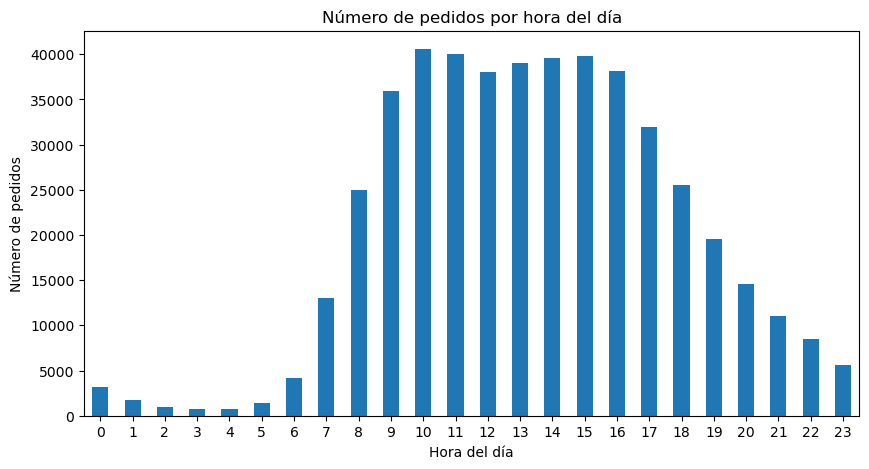

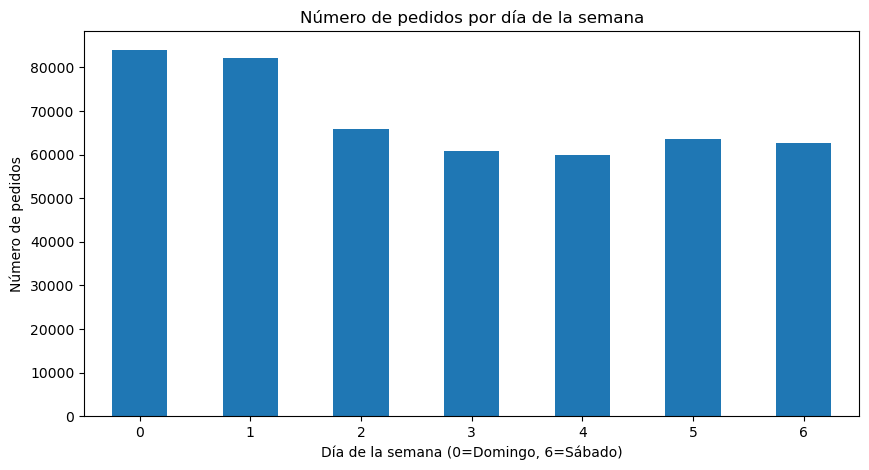

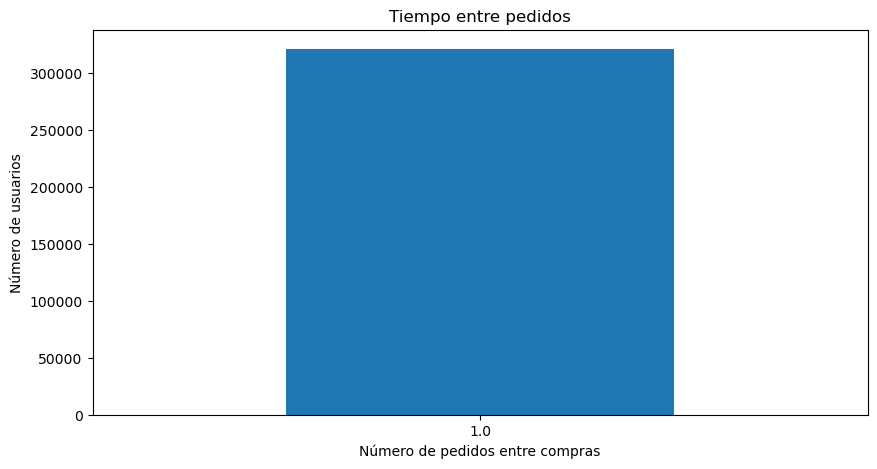

Tiempo mínimo entre pedidos: 1.0
Tiempo máximo entre pedidos: 1.0


In [68]:
# Verificar valores razonables en 'order_hour_of_day' y 'order_dow'
hour_valid = orders['order_hour_of_day'].between(0, 23).all()
dow_valid = orders['order_dow'].between(0, 6).all()

print(f"Valores de 'order_hour_of_day' son razonables: {hour_valid}")
print(f"Valores de 'order_dow' son razonables: {dow_valid}")

# Gráfico del número de pedidos por hora del día
plt.figure(figsize=(10, 5))
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.show()

# Gráfico del número de pedidos por día de la semana
plt.figure(figsize=(10, 5))
orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana (0=Domingo, 6=Sábado)')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.show()

# Calcular el tiempo entre pedidos
orders['order_number'] = orders.groupby('user_id').cumcount() + 1
orders['prev_order_time'] = orders.groupby('user_id')['order_number'].shift(1)
orders['time_between_orders'] = orders['order_number'] - orders['prev_order_time']
time_between_orders = orders['time_between_orders'].dropna()

# Gráfico del tiempo que la gente espera hasta hacer su siguiente pedido
plt.figure(figsize=(10, 5))
time_between_orders.value_counts().sort_index().plot(kind='bar')
plt.title('Tiempo entre pedidos')
plt.xlabel('Número de pedidos entre compras')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=0)
plt.show()

# Comentarios sobre los valores mínimos y máximos
min_time = time_between_orders.min()
max_time = time_between_orders.max()
print(f"Tiempo mínimo entre pedidos: {min_time}")
print(f"Tiempo máximo entre pedidos: {max_time}") 

In [69]:
# Verificar rangos de valores
# Verificar que 'order_dow' esté entre 0 y 6
dow_unicos = orders['order_dow'].unique()
print(f"Valores únicos en 'order_dow': {dow_unicos}")
if not all(0 <= x <= 6 for x in dow_unicos):
    print("Alerta: 'order_dow' contiene valores fuera del rango 0-6.")
print("\n")

# Verificar que 'order_hour_of_day' esté entre 0 y 23
hora_unicos = orders['order_hour_of_day'].unique()
print(f"Valores únicos en 'order_hour_of_day': {hora_unicos}")
if not all(0 <= x <= 23 for x in hora_unicos):
    print("Alerta: 'order_hour_of_day' contiene valores fuera del rango 0-23.")
print("\n")

# 5. Verificar que 'days_since_prior_order' no tenga valores negativos
dias_unicos = orders['days_since_prior_order'].unique()
print(f"Valores únicos en 'days_since_prior_order': {dias_unicos}")
if any(x < 0 for x in dias_unicos):
    print("Alerta: 'days_since_prior_order' contiene valores negativos.")

Valores únicos en 'order_dow': [6 5 0 4 3 1 2]


Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


Valores únicos en 'days_since_prior_order': [30.  9.  2. 10. 17. 15. 22.  4.  8.  3. 12. 11.  7.  1.  5.  6. 14. nan
 20. 16. 24. 23. 27. 13.  0. 28. 21. 25. 19. 18. 29. 26.]


### Para cada hora del día, ¿cuántas personas hacen órdenes?

In [70]:
# Agrupar por 'order_hour_of_day' y contar el número de usuarios únicos
ordenes_por_hora = orders.groupby('order_hour_of_day')['user_id'].nunique()

# Convertir a DataFrame para una mejor visualización
ordenes_por_hora = ordenes_por_hora.reset_index()
ordenes_por_hora.columns = ['order_hour_of_day', 'unique_users']

print(ordenes_por_hora)


    order_hour_of_day  unique_users
0                   0          2991
1                   1          1671
2                   2           958
3                   3           744
4                   4           735
5                   5          1281
6                   6          3757
7                   7         10993
8                   8         20268
9                   9         28112
10                 10         32195
11                 11         32660
12                 12         31754
13                 13         32433
14                 14         32797
15                 15         32894
16                 16         31579
17                 17         26825
18                 18         21795
19                 19         17026
20                 20         12891
21                 21          9806
22                 22          7670
23                 23          5167


### ¿Qué día de la semana compran víveres las personas?

In [71]:
# Contar las órdenes por día de la semana
compras_por_dia = orders['order_dow'].value_counts().sort_index()

# Mostrar el resultado
print(compras_por_dia)


order_dow
0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: count, dtype: int64


### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [72]:
# Calcular el tiempo de espera entre pedidos
tiempo_espera = orders['days_since_prior_order']

# Obtener valores mínimos y máximos
min_espera = tiempo_espera.min()
max_espera = tiempo_espera.max()

print(f"Tiempo mínimo de espera: {min_espera} días")
print(f"Tiempo máximo de espera: {max_espera} días")

Tiempo mínimo de espera: 0.0 días
Tiempo máximo de espera: 30.0 días


### Intermedio

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

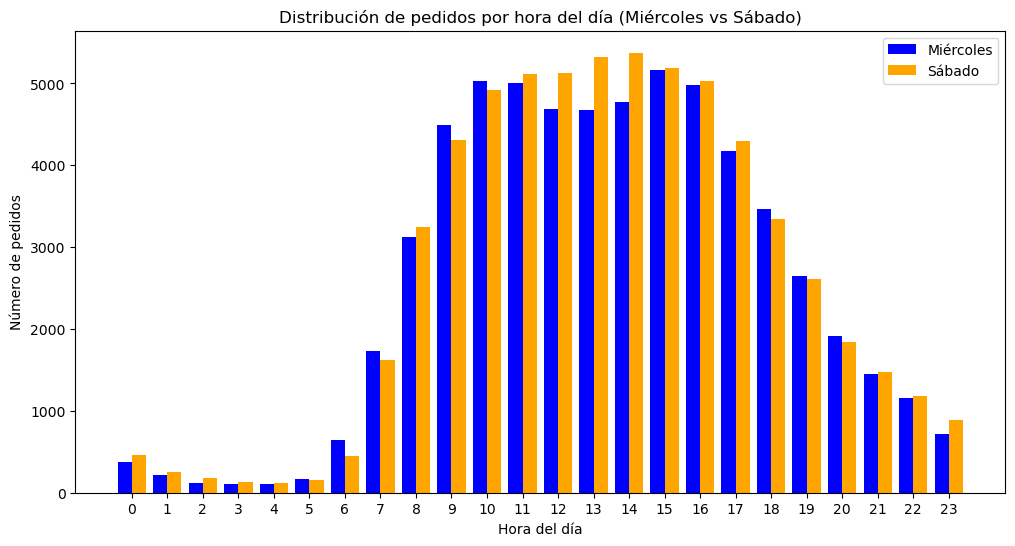

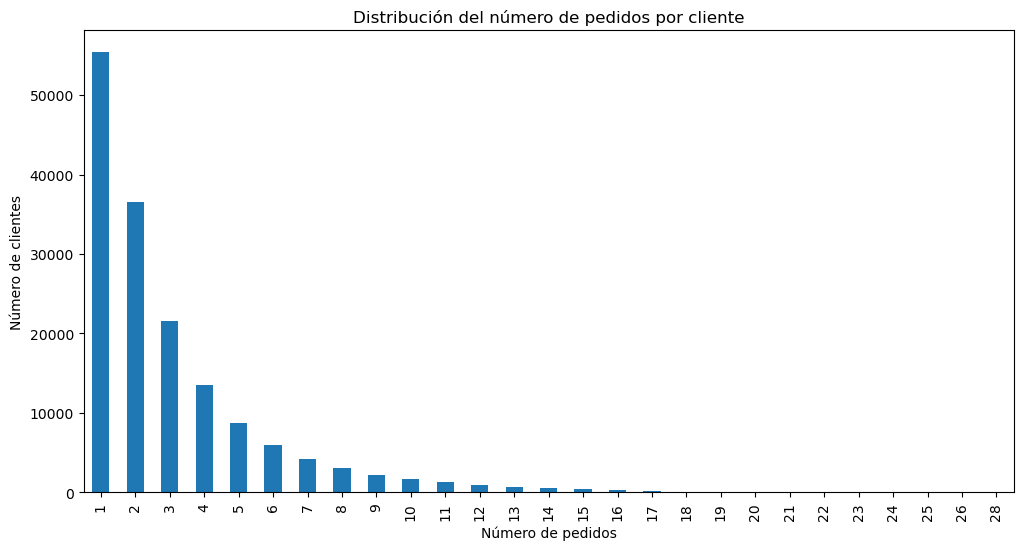

       product_id              product_name  count
5875         5876             Organic Lemon  12232
8276         8277  Apple Honeycrisp Organic  11993
13175       13176    Bag of Organic Bananas  53297
16796       16797              Strawberries  20018
21136       21137      Organic Strawberries  37039
21902       21903      Organic Baby Spinach  33971
22934       22935      Organic Yellow Onion  15898
24851       24852                    Banana  66050
24963       24964            Organic Garlic  15292
26208       26209                     Limes  19690
27844       27845        Organic Whole Milk  19600
27965       27966       Organic Raspberries  19197
28203       28204        Organic Fuji Apple  12544
39274       39275       Organic Blueberries  13879
40705       40706    Organic Grape Tomatoes  11781
45006       45007          Organic Zucchini  14584
47208       47209      Organic Hass Avocado  29773
47625       47626               Large Lemon  21495
47765       47766           Org

In [74]:
# 1. Comparar las distribuciones 'order_hour_of_day' de los miércoles y sábados
wednesday_orders = orders[orders['order_dow'] == 3]  # 3 representa miércoles
saturday_orders = orders[orders['order_dow'] == 6]   # 6 representa sábado

# Contar los pedidos por hora
wednesday_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(wednesday_counts.index - 0.2, wednesday_counts.values, width=0.4, label='Miércoles', color='blue')
plt.bar(saturday_counts.index + 0.2, saturday_counts.values, width=0.4, label='Sábado', color='orange')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Distribución de pedidos por hora del día (Miércoles vs Sábado)')
plt.xticks(range(24))
plt.legend()
plt.show()

# 2. Distribución del número de órdenes por cliente
orders_per_user = orders['user_id'].value_counts()

# Graficar la distribución
plt.figure(figsize=(12, 6))
orders_per_user.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de pedidos por cliente')
plt.show()

# 3. Los 20 principales productos más pedidos
# Cargar el archivo de detalles de pedidos
order_products = pd.read_csv('order_products.csv', sep=';') 

# Contar los productos más pedidos
top_products = order_products['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_product_details = products[products['product_id'].isin(top_products.index)].copy() 

# Agregar la cuenta de pedidos a los detalles de los productos
top_product_details.loc[:, 'count'] = top_product_details['product_id'].map(top_products)

# Mostrar los 20 productos más pedidos
print(top_product_details[['product_id', 'product_name', 'count']])

### ¿Cuál es la distribución para el número de pedidos por cliente?

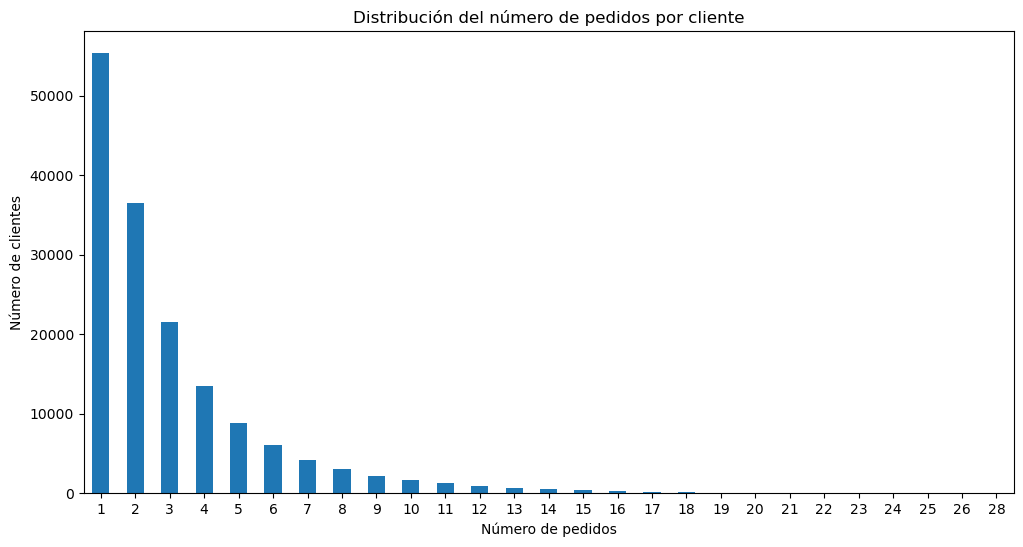

In [75]:
# Contar el número de pedidos por cliente
orders_per_user = orders['user_id'].value_counts()

# Graficar la distribución
plt.figure(figsize=(12, 6))
orders_per_user.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de pedidos por cliente')
plt.xticks(rotation=0)
plt.show()

### ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [76]:
# Contar los productos más pedidos
top_products = order_products['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_product_details = products[products['product_id'].isin(top_products.index)].copy() 

# Agregar la cuenta de pedidos a los detalles de los productos
top_product_details.loc[:, 'count'] = top_product_details['product_id'].map(top_products)

# Mostrar los 20 productos más pedidos
print(top_product_details[['product_id', 'product_name', 'count']])

       product_id              product_name  count
5875         5876             Organic Lemon  12232
8276         8277  Apple Honeycrisp Organic  11993
13175       13176    Bag of Organic Bananas  53297
16796       16797              Strawberries  20018
21136       21137      Organic Strawberries  37039
21902       21903      Organic Baby Spinach  33971
22934       22935      Organic Yellow Onion  15898
24851       24852                    Banana  66050
24963       24964            Organic Garlic  15292
26208       26209                     Limes  19690
27844       27845        Organic Whole Milk  19600
27965       27966       Organic Raspberries  19197
28203       28204        Organic Fuji Apple  12544
39274       39275       Organic Blueberries  13879
40705       40706    Organic Grape Tomatoes  11781
45006       45007          Organic Zucchini  14584
47208       47209      Organic Hass Avocado  29773
47625       47626               Large Lemon  21495
47765       47766           Org

### Difícil

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?


### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

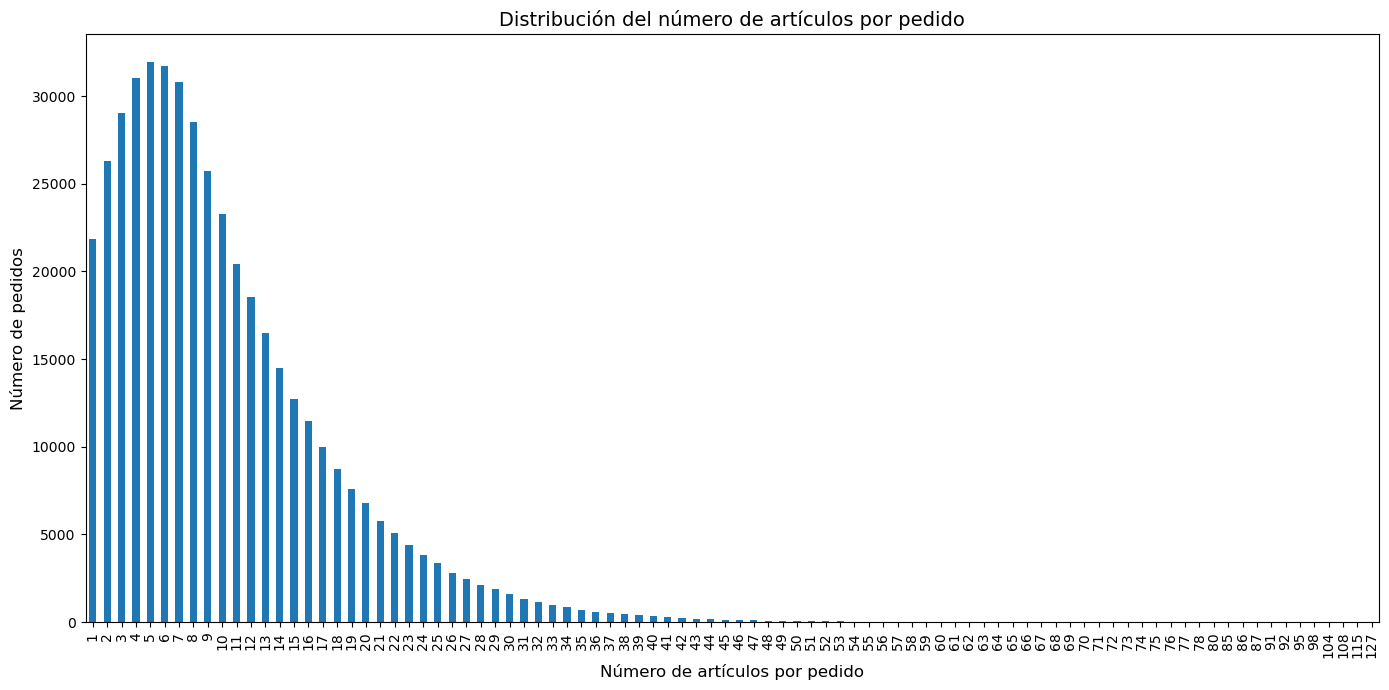

In [78]:
# Contar el número de artículos por pedido
items_per_order = order_products.groupby('order_id').size()

# Graficar la distribución
plt.figure(figsize=(14, 7))  # Aumentar el tamaño de la figura
items_per_order.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Número de artículos por pedido', fontsize=12)  # Aumentar tamaño de fuente
plt.ylabel('Número de pedidos', fontsize=12)  # Aumentar tamaño de fuente
plt.title('Distribución del número de artículos por pedido', fontsize=14)  # Aumentar tamaño de fuente
plt.xticks(rotation=90, fontsize=10)  # Rotar etiquetas y aumentar tamaño de fuente
plt.tight_layout()  # Ajustar el layout para evitar superposiciones
plt.show()

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [79]:
# Contar los productos más pedidos
top_products = order_products['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_product_details = products[products['product_id'].isin(top_products.index)].copy()
top_product_details['count'] = top_product_details['product_id'].map(top_products)

# Mostrar los 20 productos más pedidos
print(top_product_details[['product_id', 'product_name', 'count']])

       product_id              product_name  count
5875         5876             Organic Lemon  12232
8276         8277  Apple Honeycrisp Organic  11993
13175       13176    Bag of Organic Bananas  53297
16796       16797              Strawberries  20018
21136       21137      Organic Strawberries  37039
21902       21903      Organic Baby Spinach  33971
22934       22935      Organic Yellow Onion  15898
24851       24852                    Banana  66050
24963       24964            Organic Garlic  15292
26208       26209                     Limes  19690
27844       27845        Organic Whole Milk  19600
27965       27966       Organic Raspberries  19197
28203       28204        Organic Fuji Apple  12544
39274       39275       Organic Blueberries  13879
40705       40706    Organic Grape Tomatoes  11781
45006       45007          Organic Zucchini  14584
47208       47209      Organic Hass Avocado  29773
47625       47626               Large Lemon  21495
47765       47766           Org

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [80]:
# Unir las tablas usando order_id
merged_data = pd.merge(order_products, orders, on='order_id')

# Agrupar por product_id y calcular la media de la columna reordered
repetition_rate = merged_data.groupby('product_id')['reordered'].mean()

# Mostrar la tasa de repetición
print(repetition_rate)

product_id
1        0.565836
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [81]:
# Unir los DataFrames para tener acceso a los productos y los pedidos de cada usuario
merged_data = orders.merge(order_products, on='order_id')

# Contar el total de productos pedidos por cada cliente
total_products_per_user = merged_data.groupby('user_id')['product_id'].count().reset_index(name='total_products')

# Calcular la proporción de productos que se vuelven a pedir
# Agrupar por user_id y calcular la media de la columna 'reordered'
reordered_per_user = merged_data.groupby('user_id')['reordered'].mean().reset_index(name='proportion_reordered')

# Unir los dos DataFrames para tener el total de productos y la proporción de productos repetidos
user_product_counts = total_products_per_user.merge(reordered_per_user, on='user_id', how='left').fillna(0)

# Mostrar el resultado
print(user_product_counts[['user_id', 'total_products', 'proportion_reordered']])

        user_id  total_products  proportion_reordered
0             2              26              0.038462
1             4               2              0.000000
2             5              12              0.666667
3             6               4              0.000000
4             7              14              0.928571
...         ...             ...                   ...
149621   206203              27              0.222222
149622   206206              21              0.714286
149623   206207              46              0.891304
149624   206208             125              0.696000
149625   206209              25              0.320000

[149626 rows x 3 columns]


### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [82]:
# Ordenar el DataFrame por order_id y add_to_cart_order de forma ascendente
order_products_sorted = order_products.sort_values(by=['order_id', 'add_to_cart_order'])

# Obtener el primer producto añadido a cada carrito
first_products = order_products_sorted.groupby('order_id').first().reset_index()

# Contar cuántas veces fue el primer producto añadido
first_product_counts = first_products['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
first_product_details = products[products['product_id'].isin(first_product_counts.index)].copy()
first_product_details['count'] = first_product_details['product_id'].map(first_product_counts)

# Mostrar los 20 principales artículos que fueron el primer artículo en añadirse al carrito
print(first_product_details[['product_id', 'product_name', 'count']])

       product_id                 product_name  count
195           196                         Soda   1733
5784         5785  Organic Reduced Fat 2% Milk   1310
12340       12341                Hass Avocados   1340
13175       13176       Bag of Organic Bananas  11026
16796       16797                 Strawberries   2308
19659       19660                 Spring Water   2336
21136       21137         Organic Strawberries   3946
21902       21903         Organic Baby Spinach   3336
22934       22935         Organic Yellow Onion   1246
24851       24852                       Banana  15562
26208       26209                        Limes   1370
27085       27086                  Half & Half   1309
27844       27845           Organic Whole Milk   4363
27965       27966          Organic Raspberries   2024
38688       38689     Organic Reduced Fat Milk   1397
44631       44632   Sparkling Water Grapefruit   1914
47208       47209         Organic Hass Avocado   3390
47625       47626           

### Conclusion general del proyecto:

### A través del análisis de los datos de pedidos, hemos logrado calcular la proporción de productos que cada cliente había pedido anteriormente, lo que nos proporciona una visión valiosa sobre su comportamiento de compra. Este tipo de análisis es crucial para las empresas, ya que les permite entender mejor las preferencias de sus clientes y ajustar su oferta en consecuencia.

### Además, al identificar patrones en los pedidos, se pueden desarrollar estrategias de marketing más efectivas y mejorar la gestión del inventario. Sin embargo, siempre hay espacio para mejorar; por ejemplo, podríamos considerar incluir variables adicionales que nos ayuden a profundizar aún más en el análisis.

### Personalmente, este ejercicio me ha permitido fortalecer mis habilidades en programación y análisis de datos, y me ha recordado la importancia de interpretar correctamente los resultados. Invito a otros a explorar sus propios conjuntos de datos y a descubrir las historias que pueden contar.